In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1

# Loading the CSV files and Concatenating them

In [2]:
state0=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states0.csv", index_col=0)
state1=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states1.csv",index_col=0 )
state2=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states2.csv",index_col=0)
state3=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states3.csv",index_col=0)
state4=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states4.csv",index_col=0)
state5=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states5.csv",index_col=0)
state6=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states6.csv",index_col=0)
state7=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states7.csv",index_col=0)
state8=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states8.csv",index_col=0)
state9=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/states9.csv",index_col=0)

In [3]:
us_census=pd.concat([state0, state1,state2, state3,state4, state5,state6, state7, state8, state9], ignore_index=True)

# Checking Column Names and Datatypes

In [4]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

# Check the Head of DataFrame

In [6]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


# Converting Income column into Numeric

In [7]:
def split_income(value):
    return round(float(value.split("$")[1]),3)

In [8]:
us_census["Income"]=us_census["Income"].apply(split_income)

# Spliting GenderPop into Male and Female

In [9]:
def splitfunc_m(genderpop):
    return int(genderpop.split("M")[0])
        
def splitfunc_f(genderpop):
    if len(genderpop.split("_")[1])>1:
        return int(genderpop.split("_")[1].split("F")[0])
    else:
        return np.nan

In [10]:
us_census["Male"]=us_census["GenderPop"].apply(splitfunc_m)
us_census["Female"]=us_census["GenderPop"].apply(splitfunc_f)

# Filling in missing values in Female column

In [11]:
us_census["Female"].fillna(value=us_census["TotalPop"]-us_census["Male"], inplace=True)

# Checking duplicates

In [12]:
#us_census.duplicated()

# Droping Duplicates

In [13]:
us_census.drop_duplicates(inplace=True,ignore_index=True )
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.359,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.744,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.821,3299088M_3342840F,3299088,3342840.0


# Scatter Plot

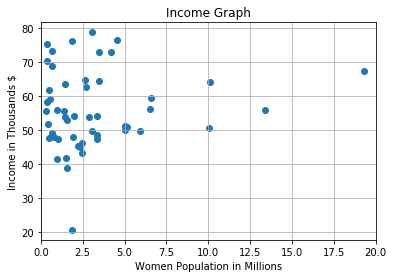

In [14]:
plt.scatter(x=us_census["Female"]/1000000,y=us_census["Income"]/1000, )
plt.xlabel("Women Population in Millions")
plt.ylabel("Income in Thousands $")
plt.grid()
plt.title("Income Graph")
plt.xlim(0,20)
plt.show()

# Converting and String values to Numeric and deleting unwanted columns

In [15]:
def split_pop(value):
    return round(float(str(value).split("%")[0]),3)

In [16]:
us_census["Hispanic%"]=us_census["Hispanic"].apply(split_pop)
us_census["White%"]=us_census["White"].apply(split_pop)
us_census["Black%"]=us_census["Black"].apply(split_pop)
us_census["Native%"]=us_census["Native"].apply(split_pop)
us_census["Asian%"]=us_census["Asian"].apply(split_pop)

In [17]:
value_replace=100-(us_census["Hispanic%"]+us_census["White%"]+us_census["Black%"]+us_census["Native%"]+us_census["Asian%"]) 
us_census["Pacific"].fillna(value_replace, inplace=True)

In [18]:
us_census["Pacific%"]=us_census["Pacific"].apply(split_pop)

In [19]:
del us_census["Hispanic"]
del us_census["White"]
del us_census["Black"]
del us_census["Native"]
del us_census["Asian"]
del us_census["Pacific"]
del us_census["GenderPop"]

In [20]:
us_census.drop_duplicates(inplace=True, ignore_index=True)
us_census.head(3)

,State,TotalPop,Income,Male,Female,Hispanic%,White%,Black%,Native%,Asian%,Pacific%
0,Alabama,4830620,43296.359,2341093,2489527.0,3.752,61.879,31.253,0.453,1.050,0.034
1,Alaska,733375,70354.744,384160,349215.0,5.910,60.910,2.849,16.391,5.450,1.059
2,Arizona,6641928,54207.821,3299088,3342840.0,29.566,57.120,3.851,4.355,2.877,0.168


# Histogram

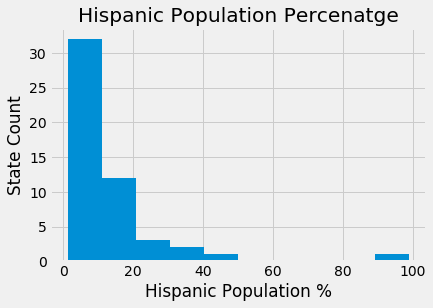

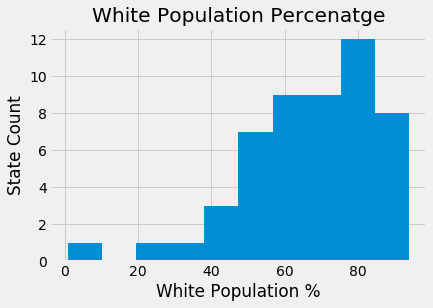

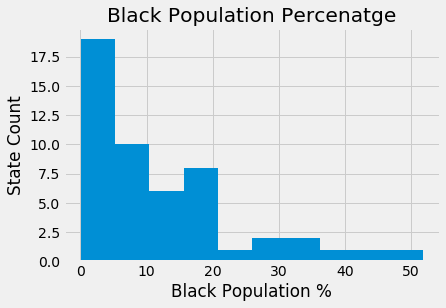

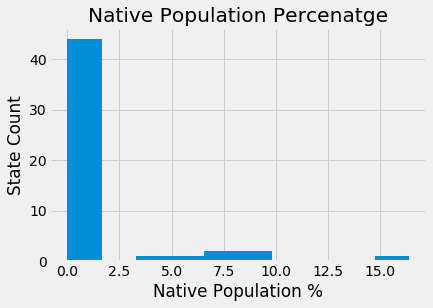

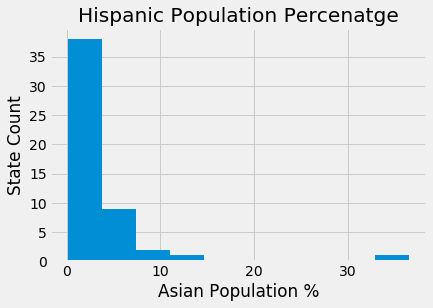

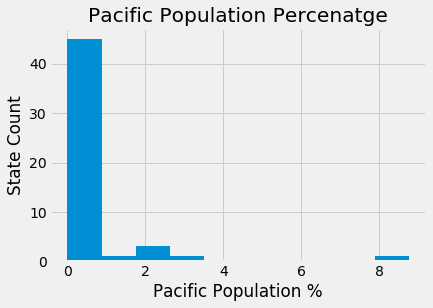

In [21]:
plt.style.use("fivethirtyeight")
#plt.style.use("ggplot")

plt.hist(us_census["Hispanic%"])
plt.xlabel("Hispanic Population %")
plt.ylabel("State Count")
plt.title("Hispanic Population Percenatge")
plt.show()

plt.hist(us_census["White%"])
plt.xlabel("White Population %")
plt.ylabel("State Count")
plt.title("White Population Percenatge")
plt.show()

plt.hist(us_census["Black%"])
plt.xlabel("Black Population %")
plt.ylabel("State Count")
plt.title("Black Population Percenatge")
plt.show()

plt.hist(us_census["Native%"])
plt.xlabel("Native Population %")
plt.ylabel("State Count")
plt.title("Native Population Percenatge")
plt.show()

plt.hist(us_census["Asian%"])
plt.xlabel("Asian Population %")
plt.ylabel("State Count")
plt.title("Hispanic Population Percenatge")
plt.show()

plt.hist(us_census["Pacific%"])
plt.xlabel("Pacific Population %")
plt.ylabel("State Count")
plt.title("Pacific Population Percenatge")
plt.show()

#us_census.plot(y=["Female", "Male"], x= "State", kind="barh")

# PART 2

# Loading the Inventory CSV

In [22]:
inventory=pd.read_csv(r"C:/Users/Lenovo NB User/PIAIC/inventory.csv", index_col=0)

# First 10 Rows of Inventory

In [23]:
inventory.head(10)

,product_type,product_description,quantity,price
location,,,,
Staten Island,seeds,daisy,4,6.99
Staten Island,seeds,calla lily,46,19.99
Staten Island,seeds,tomato,85,13.99
Staten Island,garden tools,rake,4,13.99
Staten Island,garden tools,wheelbarrow,0,89.99
Staten Island,garden tools,spade,93,19.99
Staten Island,pest_control,insect killer,74,12.99
Staten Island,pest_control,weed killer,8,23.99
Staten Island,planter,20 inch terracotta planter,0,17.99


# Staten Island

In [24]:
staten_island = inventory.loc["Staten Island"]

In [25]:
product_request=staten_island["product_description"]
product_request.to_frame()

,product_description
location,
Staten Island,daisy
Staten Island,calla lily
Staten Island,tomato
Staten Island,rake
Staten Island,wheelbarrow
Staten Island,spade
Staten Island,insect killer
Staten Island,weed killer
Staten Island,20 inch terracotta planter


# Brooklyn Seeds

In [26]:
brooklyn=inventory.loc["Brooklyn"]
seed_request=brooklyn[brooklyn["product_type"]=="seeds"]
seed_request

,product_type,product_description,quantity,price
location,,,,
Brooklyn,seeds,daisy,50,6.99
Brooklyn,seeds,calla lily,0,19.99
Brooklyn,seeds,tomato,0,13.99


# Adding instock Column

In [27]:
def instock(quantity):
    if quantity > 0:
        return True
    else:
        return False

In [28]:
inventory["in_stock"]=inventory["quantity"].apply(instock)
inventory.head(3)

,product_type,product_description,quantity,price,in_stock
location,,,,,
Staten Island,seeds,daisy,4,6.99,True
Staten Island,seeds,calla lily,46,19.99,True
Staten Island,seeds,tomato,85,13.99,True


# Adding Total Value Column

In [29]:
inventory['total_value']=inventory['price']*inventory['quantity']
inventory.head(3)

,product_type,product_description,quantity,price,in_stock,total_value
location,,,,,,
Staten Island,seeds,daisy,4,6.99,True,27.96
Staten Island,seeds,calla lily,46,19.99,True,919.54
Staten Island,seeds,tomato,85,13.99,True,1189.15


# Adding Full description Column

In [31]:
inventory["full_description"]=inventory[["product_type","product_description"]].apply(lambda x: '{} - {}'.format(
    x.product_type,x.product_description), axis=1)

In [32]:
inventory.head(3)

,product_type,product_description,quantity,price,in_stock,total_value,full_description
location,,,,,,,
Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
